In [1]:
import numpy as np
import matplotlib.pyplot as plt

### E6: Design a Perceptron Network
inputs = np.array([
    [1,4],
    [1,5],
    [2,4],
    [2,5],
    [3,1],
    [3,2],
    [4,1],
    [4,2]
])
targets = np.array([-1, -1, -1, -1, 1, 1, 1, 1])

# i

# Creating Class
class Perceptron():
    def __init__(self, inputs, targets):
        # initiallizing inputs and targets
        self.inputs = inputs
        self.targets = targets
        # initiallizing weights and bias
        self.weights = np.random.rand(1, self.inputs.shape[1]+1)
    
    def train(self, epochs):
        """
        training perceptron model using perceptron rule
        """
        for epoch in range(epochs):
            for i, input in enumerate(self.inputs):
                # Calculating network output
                output = self.forward_pass(input)
                
                # Calculating error
                error = self.targets[i] - output
                
                # Weight updates
                self.weights[:, :-1] += error * input
                
                # Bias updates
                self.weights[:, -1] += error #.reshape(2,)

        return self
    
    def activation_function(self, array):
        
        for i, element in enumerate(array):
            if element > 0:
                array[i] = 1
            else:
                array[i] = -1
        
        return array
    
    def forward_pass(self, input):
        
        weight_output = np.dot(self.weights[:, :-1], input.T)
        weight_output += self.weights[:, -1]
                
        output = self.activation_function(weight_output)
        
        return output

[[ 4.37238226 -5.04756073  0.98465573]]


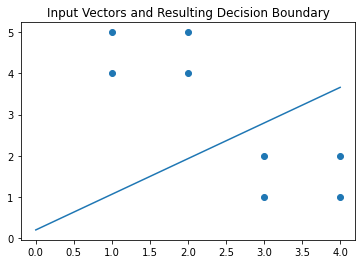

In [2]:
# Training network
perceptron = Perceptron(inputs, targets)
perceptron.train(100)
print(perceptron.weights)

# iii
# Plotting input points and network
# Plotting points
plt.scatter(inputs[:, 0], inputs[:, 1])
# Plotting decision boundary
xs = list(range(0, 5))
ys = []
for x1 in xs:
    point = ( (perceptron.weights[0,0] * x1) + perceptron.weights[0,-1] ) / (-1*perceptron.weights[0,1])
    ys.append(point)
plt.plot(xs, ys)
plt.title("Input Vectors and Resulting Decision Boundary")
plt.show()